In [240]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from pprint import pprint
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Step 1 - Data Processing

In [241]:
# Load the dataset
# View the first five records
data_url = 'https://raw.githubusercontent.com/HenokZegeye/Datascience-Course/main/MP2_Data.csv' # Found in github repository
df = pd.read_csv(data_url)
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [242]:
# Number of rows and columns
df.shape

(107, 48)

In [243]:
# What are the columns
df.columns

Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')

In [244]:
# Drop ID column
df = df.drop(['ID'], axis=1)

In [245]:
# Count of the grades we have
df.Grade.value_counts()

0    48
4    24
3    17
5    13
2     5
Name: Grade, dtype: int64

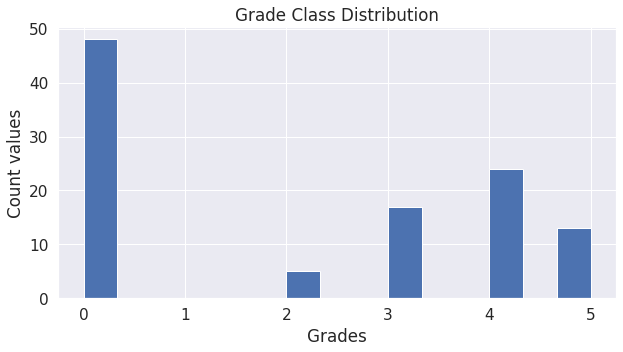

In [246]:
# Histogram for class distribution
plt.figure(figsize=(10, 5))
plt.xlabel('Grades')
plt.ylabel('Count values')
plt.title('Grade Class Distribution')
df.Grade.hist(bins=15)

In [247]:
# Check for missing values
df.isnull().sum()

Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

In [248]:
# Other columns correlation with the trarget class
df.corr().iloc[-1:]

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
Grade,0.689783,0.901788,0.887352,0.953488,0.907837,0.96813,0.865616,0.81092,0.84992,0.972348,...,0.439733,0.450807,0.584425,0.009186,0.234907,0.545532,0.496753,0.147822,0.094227,1.0


In [249]:
# Extract only features which have 0.5 and above correlation point to the grade class
columns = np.full((df.corr().shape[0],), False, dtype=bool)
corr = df.corr()
for j in range(0, corr.shape[0]):
  if corr.iloc[-1, j] > 0.5:
    if ~columns[j]:
      columns[j] = True
rf_df = df[df.columns[columns]]

In [250]:
# Features
rf_features = rf_df.columns[:-1]
rf_features

Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week3_Stat0', 'Week3_Stat1', 'Week4_Stat0', 'Week4_Stat1',
       'Week5_Stat0', 'Week6_Stat0', 'Week6_Stat1', 'Week8_Stat1',
       'Week9_Stat0'],
      dtype='object')

Step 2 - Training & Test Dataset

In [251]:
def split(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
  return X_train, X_test, y_train, y_test

In [252]:
# 80% for training data and 20% for test data
X = rf_df[rf_features] # Features
y = rf_df['Grade'] # Target Class

rf_X_train, rf_X_test, rf_y_train, rf_y_test = split(X, y)

print(f'{len(rf_X_train)} Training Dataset and {len(rf_X_test)} Testing Dataset')

85 Training Dataset and 22 Testing Dataset


Step 3 - Train the Model

In [253]:
# Instanitiate a random forest classifier object
# The training data will be processed only on one CPU core, because n_jobs is not specified. Since the size of the data is not big we don't need parallelism here
random_forest_clf = RandomForestClassifier(random_state=0)

# Train the model using the features columns and the target column(Grade)
random_forest_clf.fit(rf_X_train, rf_y_train)

RandomForestClassifier(random_state=0)

In [254]:
# Use the trained model to predict on a new dataset(Test)
random_forest_pred = random_forest_clf.predict(rf_X_test)

Step 4 - Performance Evaluation

In [255]:
# Accuracy of the model
print(f'Accuracy: {accuracy_score(rf_y_test, random_forest_pred)*100:.3f}%')

Accuracy: 95.455%


In [256]:
# F score for each class(0, 2, 3, 4, 5)
print(f1_score(rf_y_test, random_forest_pred, average=None))

[1.         0.         0.85714286 1.         1.        ]


In [257]:
# Classification Report for random forest model
print(classification_report(rf_y_test, random_forest_pred, labels=(np.unique(random_forest_pred))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3

   micro avg       0.95      1.00      0.98        21
   macro avg       0.94      1.00      0.96        21
weighted avg       0.96      1.00      0.98        21



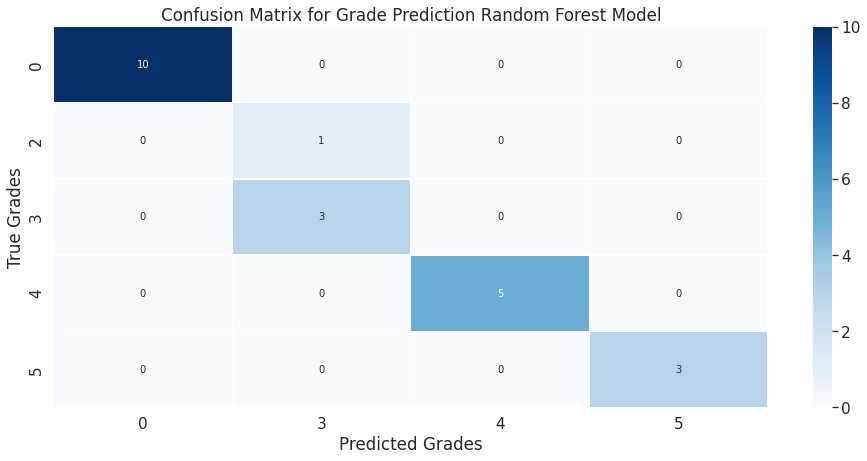

In [258]:
# Create confusion matrix
matrix = pd.crosstab(rf_y_test, random_forest_pred)
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)
class_names = [0, 2, 3, 4, 5]
plt.xlabel('Predicted Grades')
plt.ylabel('True Grades')
plt.title('Confusion Matrix for Grade Prediction Random Forest Model')
plt.show()

In [261]:
# Cross validation scores
rf_scores = cross_val_score(random_forest_clf, X, y)
rf_scores

array([0.95454545, 0.90909091, 0.95238095, 0.9047619 , 0.9047619 ])

In [262]:
# cross validation average score for random forest model
rf_scores.mean()

0.925108225108225

Step 5 - Important features

In [263]:
# The three important features
three_important_features = sorted(list(zip(rf_X_train, random_forest_clf.feature_importances_)), key=lambda tup: tup[1], reverse=True)[:3]
three_important_features

[('Week8_Total', 0.241951811440013),
 ('Week7_MP3', 0.13666694375187838),
 ('Week5_MP2', 0.13464600006629746)]

Using SVC Algorithm

In [264]:
# Using all the columns except Week8_Total column
svc_features = df.loc[:,~df.columns.isin(['Week8_Total', 'Grade'])].columns

In [265]:
# Split the data into testing and training for svc model
svc_X = df[svc_features] # Features
svc_y = df['Grade'] # Target Class

svc_X_train, svc_X_test, svc_y_train, svc_y_test = split(svc_X, svc_y)

print(f'{len(svc_X_train)} Training Dataset and {len(svc_X_test)} Testing Dataset')

85 Training Dataset and 22 Testing Dataset


In [266]:
svc=SVC(kernel='linear')

svc.fit(svc_X_train,svc_y_train)

SVC(kernel='linear')

In [267]:
# Use the prediction model on the testing data
y_pred=svc.predict(svc_X_test)

In [268]:
print(f'Accuracy: {accuracy_score(svc_y_test, y_pred)*100:.3f}%')

Accuracy: 95.455%


In [269]:
# F score for each class(0, 2, 3, 4, 5)
print(f1_score(svc_y_test, y_pred, average=None))

[1.         1.         1.         0.90909091 0.8       ]


In [270]:
# Classification report for svc model
print(classification_report(svc_y_test, y_pred, labels=(np.unique(y_pred))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.83      1.00      0.91         5
           5       1.00      0.67      0.80         3

    accuracy                           0.95        22
   macro avg       0.97      0.93      0.94        22
weighted avg       0.96      0.95      0.95        22



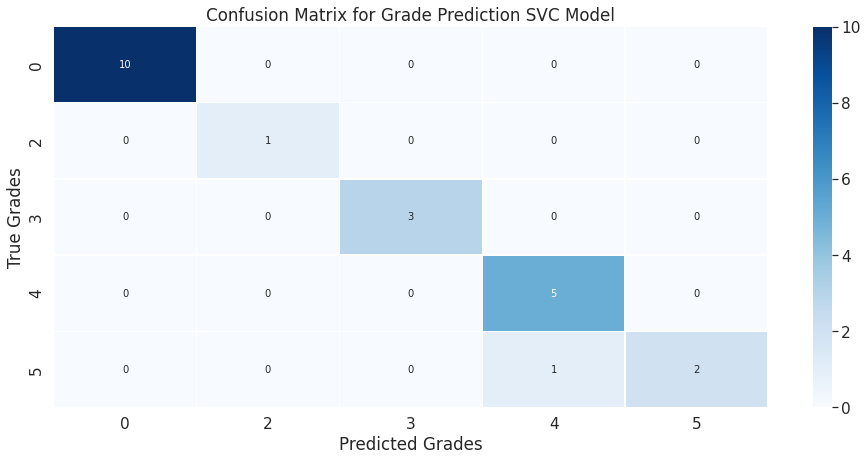

In [271]:
# Create confusion matrix for svc model
matrix = pd.crosstab(svc_y_test, y_pred)
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)
class_names = [0, 2, 3, 4, 5]
plt.xlabel('Predicted Grades')
plt.ylabel('True Grades')
plt.title('Confusion Matrix for Grade Prediction SVC Model')
plt.show()

In [272]:
# Cross validation scores for svc
scores = cross_val_score(svc, svc_X, svc_y)

scores

array([0.72727273, 0.63636364, 0.71428571, 0.71428571, 0.9047619 ])

In [273]:
# Cross validation mean score for svc
scores.mean()

0.7393939393939395